In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Describe the data

In [2]:
df_fact = pd.read_csv('./data/all_data.csv', index_col=0)

In [3]:
df_fact

,Datetime,Price_HU,Load_avg_HU,Solar_Fcast_avg_HU,Wind_Onshore_avg_HU,Price_RO,Load_avg_RO,Solar_Fcast_avg_RO,Wind_Onshore_avg_RO,Price_AT,...,Price_2d_RO,Price_7d_RO,Price_2d_AT,Price_7d_AT,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT
0,2019-01-08 00:00:00+00:00,51.40,5069.50,0.0,22.50,181.78,6959.00,0.0,1456.00,42.02,...,236.99,279.00,52.46,33.48,1,1,1,0,0,0
1,2019-01-08 00:00:00+00:00,51.40,5069.50,0.0,22.50,181.78,6959.00,0.0,1456.00,42.02,...,236.99,279.00,52.46,33.48,1,1,1,0,0,0
2,2019-01-08 01:00:00+00:00,42.99,4876.25,0.0,31.75,170.46,6874.00,0.0,1397.00,38.06,...,223.69,245.54,49.02,39.76,1,1,1,0,0,0
3,2019-01-08 01:00:00+00:00,42.99,4876.25,0.0,31.75,170.46,6874.00,0.0,1397.00,38.06,...,223.69,245.54,49.02,39.76,1,1,1,0,0,0
4,2019-01-08 02:00:00+00:00,41.00,4672.50,0.0,32.00,161.23,6860.00,0.0,1347.00,39.05,...,214.92,169.98,49.01,39.78,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90287,2024-03-24 21:00:00+00:00,73.74,5193.50,0.0,68.00,73.68,5877.25,1.0,928.25,69.52,...,77.62,72.33,75.46,72.33,1,1,1,0,0,0
90288,2024-03-24 22:00:00+00:00,70.07,4897.25,0.0,71.75,70.10,5498.75,1.0,938.75,67.32,...,75.14,72.10,74.76,72.10,1,1,1,0,0,0
90289,2024-03-24 22:00:00+00:00,70.07,4897.25,0.0,71.75,70.10,5498.75,1.0,938.75,67.32,...,75.14,72.10,74.76,72.10,1,1,1,0,0,0
90290,2024-03-24 23:00:00+00:00,66.02,4582.75,0.0,77.25,66.06,5216.25,0.0,1180.50,64.69,...,72.19,65.91,71.82,65.91,1,1,1,0,0,0


In [4]:
df_fact.columns

Index(['Datetime', 'Price_HU', 'Load_avg_HU', 'Solar_Fcast_avg_HU',
       'Wind_Onshore_avg_HU', 'Price_RO', 'Load_avg_RO', 'Solar_Fcast_avg_RO',
       'Wind_Onshore_avg_RO', 'Price_AT', 'Load_avg_AT', 'Solar_Fcast_avg_AT',
       'Wind_Onshore_avg_AT', 'temperature_2m_BP', 'relative_humidity_2m_BP',
       'pressure_msl_BP', 'surface_pressure_BP', 'precipitation_BP', 'rain_BP',
       'cloud_cover_BP', 'cloud_cover_low_BP', 'cloud_cover_mid_BP',
       'cloud_cover_high_BP', 'shortwave_radiation_BP', 'direct_radiation_BP',
       'diffuse_radiation_BP', 'sunshine_duration_BP', 'wind_speed_10m_BP',
       'wind_speed_100m_BP', 'wind_direction_10m_BP', 'wind_direction_100m_BP',
       'wind_gusts_10m_BP', 'temperature_2m_Konstanca',
       'relative_humidity_2m_Konstanca', 'pressure_msl_Konstanca',
       'surface_pressure_Konstanca', 'precipitation_Konstanca',
       'rain_Konstanca', 'cloud_cover_Konstanca', 'cloud_cover_low_Konstanca',
       'cloud_cover_mid_Konstanca', 'cloud_cov

# Create input df

In [5]:
target_cc = 'HU'
other_county_codes = ['AT', 'RO']

In [6]:
def create_in_df(df_fact, target_cc, other_county_codes):
   df_in = df_fact[[f'Price_{target_cc}', 'Datetime', 'year', 'month', 'day', 'hour', 'weekday',
      'dayoftheweek', 'Datetime-2d', 'Datetime-7d',
      'Price_2d_HU', 'Price_7d_HU', 'Price_2d_RO', 'Price_7d_RO',
      'Price_2d_AT', 'Price_7d_AT', 'is_holiday_HU', 'is_holiday_RO',
      'is_holiday_AT', 'is_workday_HU', 'is_workday_RO', 'is_workday_AT', f'Load_avg_{target_cc}']]
   
   df_in = df_in.drop(columns=['Datetime-2d', 'Datetime-7d'])

   df_in['Datetime'] = pd.to_datetime(df_in['Datetime'])
   
   return df_in

In [7]:
df_in = create_in_df(df_fact, target_cc, other_county_codes)

In [8]:
#unlimit cols
pd.set_option('display.max_columns', None)

In [9]:
df_in

,Price_HU,Datetime,year,month,day,hour,weekday,dayoftheweek,Price_2d_HU,Price_7d_HU,Price_2d_RO,Price_7d_RO,Price_2d_AT,Price_7d_AT,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT,Load_avg_HU
0,51.40,2019-01-08 00:00:00+00:00,2019,1,8,0,1,1,50.81,59.90,236.99,279.00,52.46,33.48,1,1,1,0,0,0,5069.50
1,51.40,2019-01-08 00:00:00+00:00,2019,1,8,0,1,1,50.81,59.90,236.99,279.00,52.46,33.48,1,1,1,0,0,0,5069.50
2,42.99,2019-01-08 01:00:00+00:00,2019,1,8,1,1,1,47.95,52.71,223.69,245.54,49.02,39.76,1,1,1,0,0,0,4876.25
3,42.99,2019-01-08 01:00:00+00:00,2019,1,8,1,1,1,47.95,52.71,223.69,245.54,49.02,39.76,1,1,1,0,0,0,4876.25
4,41.00,2019-01-08 02:00:00+00:00,2019,1,8,2,1,1,46.07,36.49,214.92,169.98,49.01,39.78,1,1,1,0,0,0,4672.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90287,73.74,2024-03-24 21:00:00+00:00,2024,3,24,21,6,6,78.11,72.33,77.62,72.33,75.46,72.33,1,1,1,0,0,0,5193.50
90288,70.07,2024-03-24 22:00:00+00:00,2024,3,24,22,6,6,75.69,72.10,75.14,72.10,74.76,72.10,1,1,1,0,0,0,4897.25
90289,70.07,2024-03-24 22:00:00+00:00,2024,3,24,22,6,6,75.69,72.10,75.14,72.10,74.76,72.10,1,1,1,0,0,0,4897.25
90290,66.02,2024-03-24 23:00:00+00:00,2024,3,24,23,6,6,72.81,65.91,72.19,65.91,71.82,65.91,1,1,1,0,0,0,4582.75


# Evaluation metric

In [10]:
def base_eval(y_true, y_pred, do_print=True):
    error = np.mean(abs(y_true - y_pred))
    if do_print:
        print(f'Base evaluation (abs error): {error}')
    return error

In [11]:
def weighted_eval(y_true, y_pred, load, do_print=True):
    error = np.mean(abs((y_true - y_pred)*load))
    if do_print:
        print(f'Weighted evaluation (abs error): {error}')
    return error

In [12]:
def do_modeling(model, train_df, test_df, input_cols, target_col):
    model.fit(train_df[input_cols], train_df[target_col])
    y_pred = model.predict(test_df[input_cols])
    y_true = test_df[target_col]
    base_eval(y_true, y_pred)
    weighted_eval(y_true, y_pred, test_df['Load_avg'])

# Plot functions

In [13]:
def plot_predictions(y_true, y_pred, model_name, x_ticks=None, x_tick_labels=None):
    plt.figure(figsize=(15, 5))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels)
        plt.xticks(rotation=90)
    plt.title(model_name)
    plt.legend()
    plt.show()

In [14]:
def plot_predictions_by_df(plot_df, model_name):
    plt.figure(figsize=(15, 5))
    plt.plot(plot_df['True'], label='True')
    plt.plot(plot_df['Predicted'], label='Predicted')
    plt.xlabel('Datetime')
    plt.ylabel('Price')

    #xtick only every 12 hours but show datetimes
    x_ticks = np.arange(0, len(plot_df), 12)
    x_tick_labels = plot_df['Datetime'].iloc[x_ticks]
    plt.xticks(x_ticks, x_tick_labels)
    plt.xticks(rotation=90)
    

    plt.title(model_name)
    plt.legend()
    plt.show()
    

In [15]:
def plot_feature_importances(importances):
    importances = dict(importances)
    importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
    plt.figure(figsize=(15, 5))
    plt.bar(importances.keys(), importances.values())
    plt.xticks(rotation=90)
    plt.title('Feature importances')
    plt.show()

In [16]:
def plot_losses(base_loss, weighted_loss):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(base_loss, label='Base loss')
    ax.set_ylabel('Base loss', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(weighted_loss, color='tab:orange', label='Weighted loss')
    ax2.set_ylabel('Weighted loss', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    fig.legend()
    plt.title('Losses')
    plt.show()

In [17]:
def plot_two_importances_change(feature_importances, col_a, col_b):
    imp_a = []
    imp_b = []
    for fi in feature_importances:
        imp_a.append([x[1] for x in fi if x[0] == col_a][0])
        imp_b.append([x[1] for x in fi if x[0] == col_b][0])

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(imp_a, label=col_a)
    ax.set_ylabel(col_a, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(imp_b, color='tab:orange', label=col_b)
    ax2.set_ylabel(col_b, color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.legend()
    plt.title(f'Feature importances of {col_a} and {col_b}')

# Framework

With this framework we can predict the prices for a couple of days and after predicting for a day the model train again with the new data.

In [18]:
from tqdm import tqdm
import xgboost as xgb

In [19]:
test_period_start = pd.to_datetime('2024-01-01 09:00:00+00:00')
test_period_end = df_in.iloc[-1]['Datetime']

In [20]:
target_col = f'Price_{target_cc}'
input_cols = [col for col in df_in.columns if col != target_col and col != 'Datetime' and col != f'Load_avg_{target_cc}']

In [21]:
def do_modeling(model, df, input_cols, target_col):
    model_base_loss = []
    model_weighted_loss = []
    model_pred = []

    feature_importances = []
    

    for date in tqdm(pd.date_range(start=test_period_start, end=test_period_end, freq='D')):
        next_day = date + pd.Timedelta(days=1)

        X_train = df.loc[(df['Datetime'] < date), input_cols]
        y_train = df.loc[(df['Datetime'] < date), target_col]
        X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
        y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]

        loads = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), f'Load_avg_{target_cc}']

        model.fit(X_train, y_train)
        gbr_pred = model.predict(X_test)

        model_pred.extend(gbr_pred)

        model_base_loss.append(base_eval(y_test, gbr_pred, do_print=False))
        model_weighted_loss.append(weighted_eval(y_test, gbr_pred, loads, do_print=False))
        try:
            feature_importances.append(list(zip(X_train.columns, model.feature_importances_)))
        except:
            feature_importances.append(None)
    
    return (model, model_base_loss, model_weighted_loss, model_pred, feature_importances)

In [22]:
gbr = xgb.XGBRegressor(random_state=42, tree_method='hist', device='cuda')
output = do_modeling(gbr, df_in, input_cols, target_col)
gbr, gbr_base_loss, gbr_weighted_loss, gbr_pred, gbr_feature_importances = output

  0%|          | 0/84 [00:00<?, ?it/s]d:\Programs\miniconda\envs\pygpu\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
100%|██████████| 84/84 [00:34<00:00,  2.43it/s]


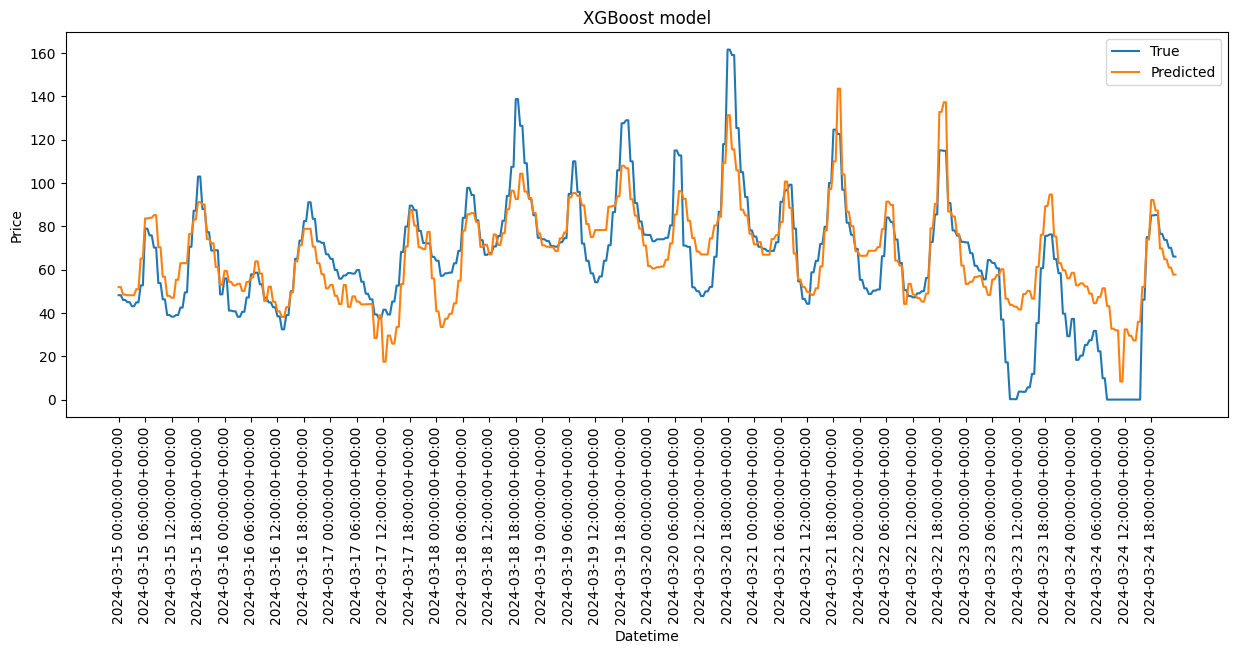

In [23]:
n_days = 10 *2
x_ticks = np.arange(0, n_days*24)
x_tick_labels = df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].astype(str).to_list()[-n_days*24:]

plot_df = pd.DataFrame({'Datetime': df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].to_list()[-n_days*24:], 'True': df_in.loc[df_in['Datetime'] >= test_period_start, target_col].to_list()[-n_days*24:], 'Predicted': gbr_pred[-n_days*24:]})

plot_predictions_by_df(plot_df, 'XGBoost model')


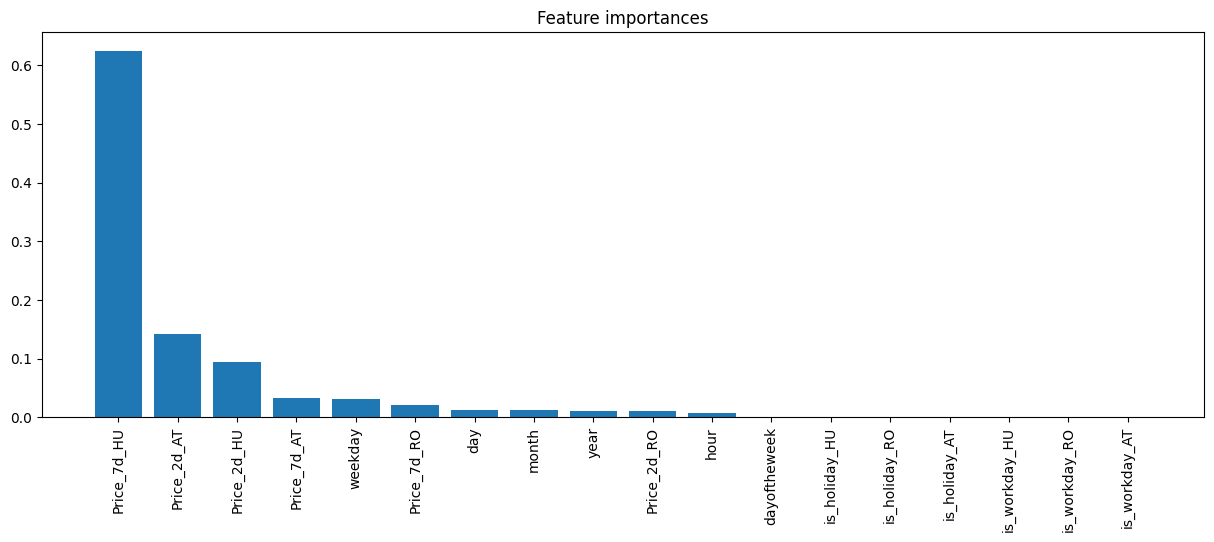

In [24]:
plot_feature_importances(gbr_feature_importances[-1])

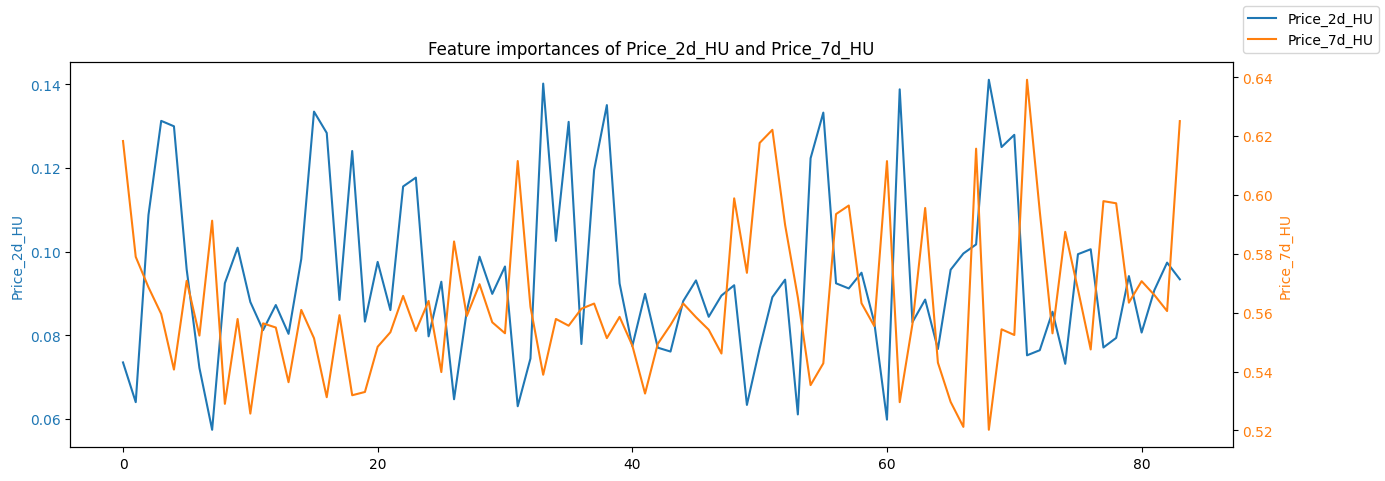

In [25]:
plot_two_importances_change(gbr_feature_importances, 'Price_2d_HU', 'Price_7d_HU')

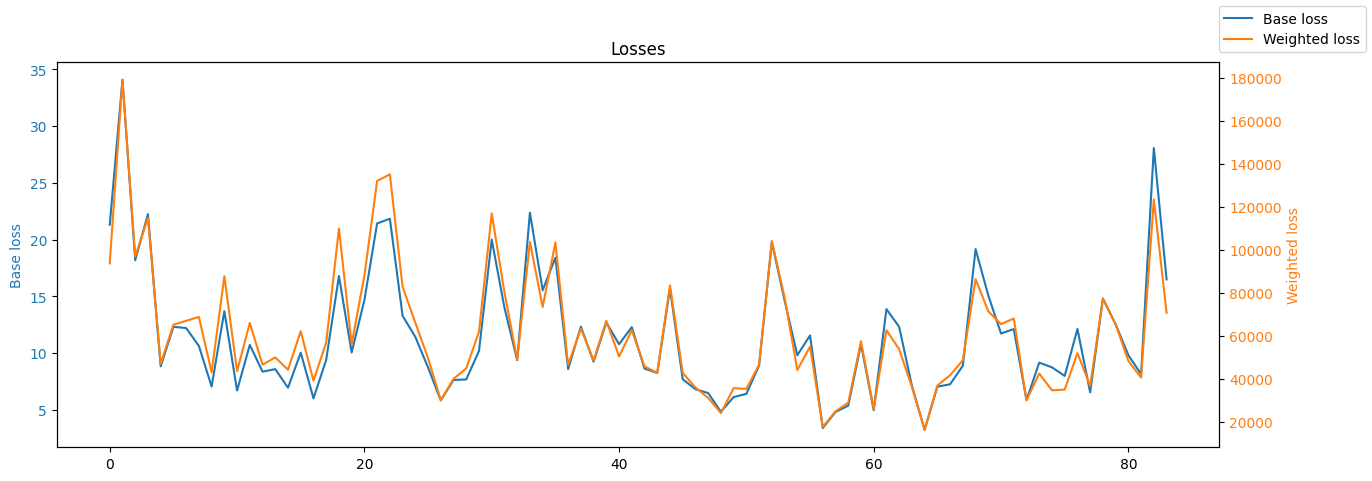

In [26]:
plot_losses(gbr_base_loss, gbr_weighted_loss)